# Самые простые индексы доверия к экономике

In [451]:
!ls data_simple_index_v2

hand_index_month.tsv
news_krizis_index_month.tsv
news_krizis_index_month_all.tsv
news_krizis_index_month_interfax.tsv
news_krizis_index_month_interfax_all.tsv
news_krizis_index_month_lenta.tsv
news_krizis_index_month_lenta_all.tsv
news_krizis_index_month_rbc.tsv
news_krizis_index_month_ria.tsv
news_krizis_index_month_ria_all.tsv
news_krizis_index_month_tass.tsv
news_krizis_index_month_tass_all.tsv
poisk_krizis_index_month.tsv
sentiment_krizis_index_day.tsv
sentiment_krizis_index_month.tsv


In [452]:
import numpy as np
import pandas as pd
import datetime

import matplotlib
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
matplotlib.style.use('ggplot')

%matplotlib inline

In [453]:
import warnings
warnings.filterwarnings("ignore")

In [454]:
def min_max_scaler(df, col):
    mx = df[col].max()
    mn = df[col].min()
    df[col] = 100*(df[col] - mn)/(mx - mn)
    pass

# 1. Ручные индексы настроений и PMI

Собираю их [в этом](https://docs.google.com/spreadsheets/d/1Pbx48NTRXNc_8EH9GVsdeESoyl1Wg3OKdhwwaIrEBak/edit#gid=0) файле

* [Индекс финансовых настроений сбера](https://www.sberbank.ru/ru/about/analytics/mood)  (писал им на почту, перстали считать в начале 18-го)
* [Индекс предпренемательской уверенности](http://www.gks.ru/wps/wcm/connect/rosstat_main/rosstat/ru/statistics/enterprise/industrial/#) и его [описание](http://www.gks.ru/free_doc/new_site/metod/prom/met_pred-uver.htm) (росстат) 
* [PMI_proiz.](https://ru.investing.com/economic-calendar/russian-markit-manufacturing-pmi-1630)
* [PMI_uslug.](https://ru.investing.com/economic-calendar/russian-markit-services-pmi-1629), тоже [норм таблицы](https://tradingeconomics.com/calendar#)
* [Индекс потребительских настроений левада-центра](http://www.levada.ru/indikatory/sotsialno-ekonomicheskie-indikatory/indeks-potrebitelskikh-nastroenii/) строят [то раз в месяц, то раз в два.](https://www.levada.ru/indikatory/sotsialno-ekonomicheskie-indikatory/) Процедура такая же как в Сбере. Разрабатывали его вместе.

In [455]:
df_hand = pd.read_csv('data_simple_index_v2/hand_index_month.tsv',sep='\t',decimal=',')

df_hand['fielddate'] = df_hand['sber_date']
df_hand.drop(['sber_date', 'sber_IFN', 'levada_IPN', 'IPU_dob', 'IPU_energ'], axis=1, inplace=True)
df_hand.set_index('fielddate', inplace=True)

df_hand['IPU_obr'] = 100*df_hand['IPU_obr'].diff(12)

for col in df_hand.columns:
    min_max_scaler(df_hand, col)

df_hand.head()

,levada_IPN_fillna,PMI_proiz,PMI_uslug,IPU_obr
fielddate,,,,
2005-01,NaN,NaN,NaN,NaN
2005-02,NaN,NaN,NaN,NaN
2005-03,NaN,NaN,NaN,NaN
2005-04,NaN,NaN,NaN,NaN
2005-05,NaN,NaN,NaN,NaN


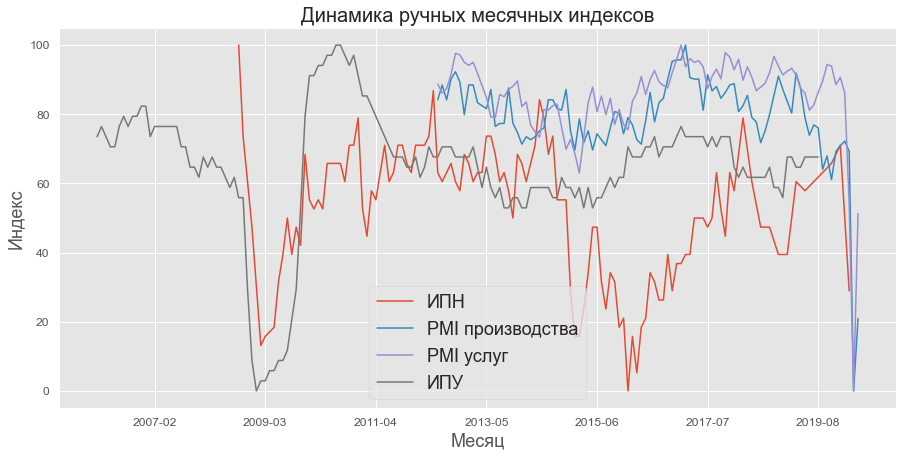

In [456]:
#df_hand = df_hand[(df_hand.index > '2012-01')&(df_hand.index < '2020-07')]

df_hand.plot(figsize=(15,7));
plt.title('Динамика ручных месячных индексов', fontsize=20);
plt.xlabel("Месяц", fontsize=18)
plt.ylabel("Индекс", fontsize=18)
plt.legend(['ИПН', 'PMI производства', 'PMI услуг', 'ИПУ'], fontsize=18);

# 2. Автоматические индексы 

In [457]:
df_poisk = pd.read_csv('data_simple_index_v2/poisk_krizis_index_month.tsv', sep='\t')
df_poisk.set_index('fielddate', inplace=True)

df_sent = pd.read_csv('data_simple_index_v2/sentiment_krizis_index_month.tsv', sep='\t')
df_sent.set_index('fielddate', inplace=True)

df_news = pd.read_csv('data_simple_index_v2/news_krizis_index_month.tsv', sep='\t')
df_news.set_index('fielddate', inplace=True)

df_index = df_poisk.join(df_sent).join(df_news).join(df_hand)
df_index.index = pd.to_datetime(df_index.index)
df_index.head()

,poiskInd_ind_corr,poiskInd_ind_pca,poiskInd_corr,poiskInd_pca,sentInd_beta_neg_pos,sentInd_beta_neg,sentInd_beta_pos,sentInd_diff,sentInd_beta_diff,newsInd_krizis_share,newsInd_krizis_corr,newsInd_krizis_neg,newsInd_krizis_neg_len,newsInd_krizis_diff,newsInd_krizis_diff_len,levada_IPN_fillna,PMI_proiz,PMI_uslug,IPU_obr
fielddate,,,,,,,,,,,,,,,,,,,
2004-01-01,15.679730,34.179246,1.932601,2.299494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-02-01,0.000000,0.004372,1.945144,3.809424,NaN,NaN,NaN,NaN,NaN,24.731849,20.871512,28.751433,31.089287,28.758503,34.770276,NaN,NaN,NaN,NaN
2004-03-01,19.770509,21.959464,4.277339,2.835021,NaN,NaN,NaN,NaN,NaN,5.241918,0.612129,3.289725,12.094990,3.083925,15.247898,NaN,NaN,NaN,NaN
2004-04-01,25.436467,24.391815,3.901864,1.686689,NaN,NaN,NaN,NaN,NaN,8.277492,34.124945,0.000000,7.667662,0.000000,10.593709,NaN,NaN,NaN,NaN
2004-05-01,9.381211,8.336980,0.273977,0.545531,NaN,NaN,NaN,NaN,NaN,9.878104,29.539187,26.968298,30.088417,27.119429,33.798114,NaN,NaN,NaN,NaN


# 3. Динамика

In [458]:
df_index.columns

Index(['poiskInd_ind_corr', 'poiskInd_ind_pca', 'poiskInd_corr',
       'poiskInd_pca', 'sentInd_beta_neg_pos', 'sentInd_beta_neg',
       'sentInd_beta_pos', 'sentInd_diff', 'sentInd_beta_diff',
       'newsInd_krizis_share', 'newsInd_krizis_corr', 'newsInd_krizis_neg',
       'newsInd_krizis_neg_len', 'newsInd_krizis_diff',
       'newsInd_krizis_diff_len', 'levada_IPN_fillna', 'PMI_proiz',
       'PMI_uslug', 'IPU_obr'],
      dtype='object')

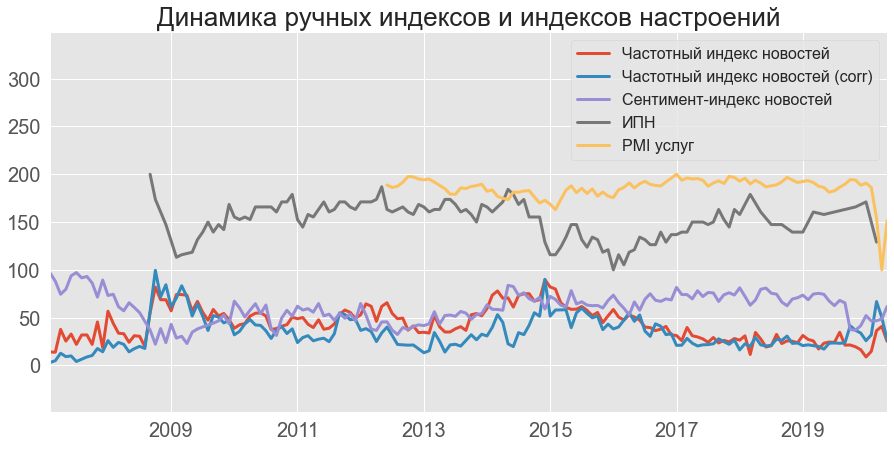

In [471]:
df_cur = df_index[(df_index.index > '2007-01')&(df_index.index < '2020-07')]

df_cur['levada_IPN_fillna'] = df_cur['levada_IPN_fillna'] + 100
df_cur['PMI_uslug'] = df_cur['PMI_uslug'] + 100


df_cur[[
#     'poiskInd_ind_corr', 
#     'poiskInd_ind_pca', 
##    'poiskInd_corr',
##    'poiskInd_pca', 

#     'sentInd_beta_neg',
#    'sentInd_diff', 
##    'sentInd_beta_neg_pos', 
##    'sentInd_beta_pos', 
##    'sentInd_beta_diff',

      'newsInd_krizis_share', 
      'newsInd_krizis_corr',
      'newsInd_krizis_diff_len', 
##     'newsInd_krizis_neg',
##     'newsInd_krizis_neg_len', 
##     'newsInd_krizis_diff',
    
    'levada_IPN_fillna', 
##    'PMI_proiz',
    'PMI_uslug', 
##    'IPU_obr'

         ]].plot(legend=True, figsize=(15,7), lw=3);

plt.title('Динамика ручных индексов и индексов настроений', fontsize=26);
plt.xlabel(" ", fontsize=18)
#plt.ylabel("Индекс", fontsize=18)
plt.ylim(-49,349)

plt.tick_params(axis = 'both', which = 'major', labelsize = 20)

plt.legend(
    # ['Индес поиска', 'Индекс поиска PCA', 'ИПН', 'PMI услуг'],
    #['Байесовский индекс настроений', 'Частотный индекс настроений', 'ИПН', 'PMI услуг'],
     ['Частотный индекс новостей', 'Частотный индекс новостей (corr)', 'Сентимент-индекс новостей', 'ИПН', 'PMI услуг'],
    loc = 'upper right', # 'upper left', #
    fontsize=16);

# 4 Корреляция

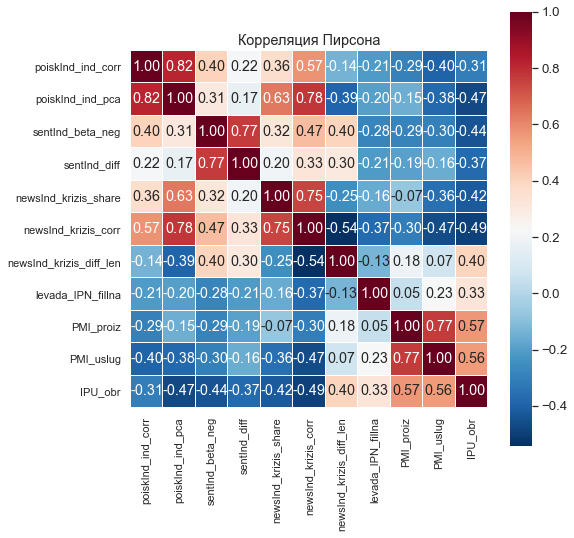

In [472]:
import seaborn as sns
sns.set(font_scale=1)
plt.subplots(figsize=(8, 8))

ind_col = [
     'poiskInd_ind_corr', 
     'poiskInd_ind_pca', 
##    'poiskInd_corr',
##    'poiskInd_pca', 

     'sentInd_beta_neg',
     'sentInd_diff', 
##    'sentInd_beta_neg_pos', 
##    'sentInd_beta_pos', 
##    'sentInd_beta_diff',

      'newsInd_krizis_share', 
      'newsInd_krizis_corr',
      'newsInd_krizis_diff_len', 
##     'newsInd_krizis_neg',
##     'newsInd_krizis_neg_len', 
##     'newsInd_krizis_diff',
    
    'levada_IPN_fillna', 
    'PMI_proiz',
    'PMI_uslug', 
    'IPU_obr'
]

sns.set(font_scale=1.2)
sns.heatmap(df_index[ind_col].corr(), square=True,
            cbar=True,
            annot=True, fmt=".2f", linewidths=0.1, cmap="RdBu_r")
plt.title('Корреляция Пирсона');

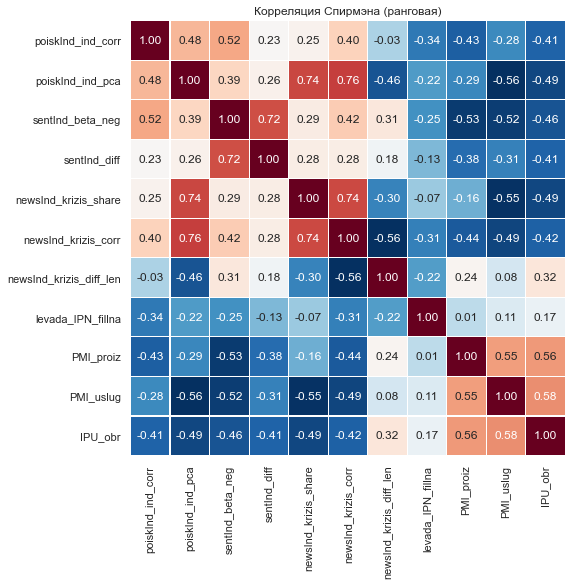

In [11]:
sns.set(font_scale=1)
plt.subplots(figsize=(8, 8))
sns.heatmap(df_index[ind_col].corr(method='spearman'), square=True,
            cbar=False,
            annot=True, fmt=".2f", linewidths=0.1, cmap="RdBu_r")
plt.title('Корреляция Спирмэна (ранговая)');

# 5 Макроданные

In [12]:
!ls data_macro

RTSI-dailyhistory-ru.csv   eur.xlsx
RTSI-monthlyhistory-ru.csv hse_stat.xlsx
data_macro_v2.csv          ipot.xls
dep_fiz.xls                usd.xlsx


Предобработка данных.

In [12]:
import re 

df_macro = pd.read_csv('data_macro/data_macro_v2.csv', sep='\t')

df_macro.set_index('fielddate', inplace=True)
df_macro.index = pd.to_datetime(df_macro.index)

# Для РТС и курса валют берём изменения в процентах
for col in ['RTS_LAST_VALUE', 'RTS_CLOSE_MEAN', 'RTS_TRADING_VOLUME_MEAN', 'USD', 'EUR']:
    df_macro[col + '_ret'] = df_macro[col].diff()
    df_macro.drop(col, axis=1, inplace=True)
    min_max_scaler(df_macro, col + '_ret')

for col in ['DEP_FIZ', 'CPI_M_CHI', 'IP2_EA_M', 'UNEMPL_M_SH', 'WAG_M', 'WAG_C_M', 
 'RTRD_M_DIRI', 'RTRD_M', 'INVFC_M', 'IM_T_M', 'IPOT_CNT', 'IPOT_VOLUME', 'IPOT_DEBT']:
    df_macro[col + '_diff_12'] = df_macro[col].diff(12)
    df_macro.drop(col, axis=1, inplace=True)
    min_max_scaler(df_macro, col + '_diff_12')

df_macro = df_macro[df_macro.index >= '2004-01-01']
    
df_macro.head()

,RTS_LAST_VALUE_ret,RTS_CLOSE_MEAN_ret,RTS_TRADING_VOLUME_MEAN_ret,USD_ret,EUR_ret,DEP_FIZ_diff_12,CPI_M_CHI_diff_12,IP2_EA_M_diff_12,UNEMPL_M_SH_diff_12,WAG_M_diff_12,WAG_C_M_diff_12,RTRD_M_DIRI_diff_12,RTRD_M_diff_12,INVFC_M_diff_12,IM_T_M_diff_12,IPOT_CNT_diff_12,IPOT_VOLUME_diff_12,IPOT_DEBT_diff_12
fielddate,,,,,,,,,,,,,,,,,,
2004-01-01,62.166656,75.457778,46.120500,NaN,NaN,NaN,84.749709,NaN,44.067797,68.019481,17.670409,70.081596,62.468258,25.477707,62.882096,NaN,NaN,NaN
2004-02-01,64.124509,73.828746,45.857870,40.394683,39.455871,NaN,84.749709,NaN,45.762712,73.322511,20.761178,71.260199,62.793296,27.115560,65.065502,NaN,NaN,NaN
2004-03-01,67.150867,76.549364,46.208978,42.400770,35.444258,NaN,84.866123,NaN,42.372881,73.011364,20.791479,72.620127,63.433215,27.716106,66.812227,NaN,NaN,NaN
2004-04-01,40.848102,72.264376,46.534955,43.240506,37.998826,NaN,84.982538,NaN,37.288136,70.481602,19.367301,73.254760,63.666836,27.388535,65.938865,NaN,NaN,NaN
2004-05-01,50.065090,55.455554,44.860345,44.112421,42.781322,NaN,84.943733,NaN,32.203390,69.074675,18.685514,73.526745,63.809040,29.135578,65.502183,NaN,NaN,NaN


<AxesSubplot:xlabel='fielddate'>

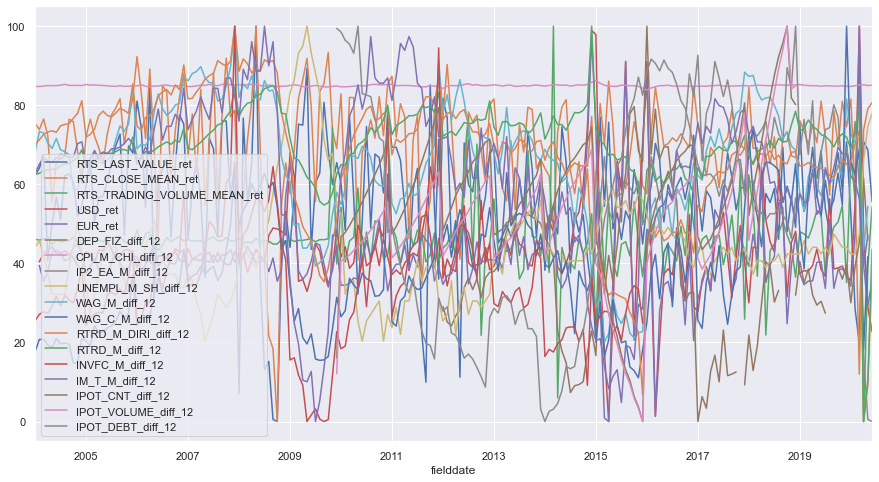

In [13]:
df_macro.plot(figsize=(15,8))

In [14]:
dff = df_index[ind_col].join(df_macro)
dff.head()

,poiskInd_ind_corr,poiskInd_ind_pca,sentInd_beta_neg,sentInd_diff,newsInd_krizis_share,newsInd_krizis_corr,newsInd_krizis_diff_len,levada_IPN_fillna,PMI_proiz,PMI_uslug,...,UNEMPL_M_SH_diff_12,WAG_M_diff_12,WAG_C_M_diff_12,RTRD_M_DIRI_diff_12,RTRD_M_diff_12,INVFC_M_diff_12,IM_T_M_diff_12,IPOT_CNT_diff_12,IPOT_VOLUME_diff_12,IPOT_DEBT_diff_12
fielddate,,,,,,,,,,,,,,,,,,,,,
2004-01-01,15.679730,34.179246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44.067797,68.019481,17.670409,70.081596,62.468258,25.477707,62.882096,NaN,NaN,NaN
2004-02-01,0.000000,0.004372,NaN,NaN,24.731849,20.871512,34.770276,NaN,NaN,NaN,...,45.762712,73.322511,20.761178,71.260199,62.793296,27.115560,65.065502,NaN,NaN,NaN
2004-03-01,19.770509,21.959464,NaN,NaN,5.241918,0.612129,15.247898,NaN,NaN,NaN,...,42.372881,73.011364,20.791479,72.620127,63.433215,27.716106,66.812227,NaN,NaN,NaN
2004-04-01,25.436467,24.391815,NaN,NaN,8.277492,34.124945,10.593709,NaN,NaN,NaN,...,37.288136,70.481602,19.367301,73.254760,63.666836,27.388535,65.938865,NaN,NaN,NaN
2004-05-01,9.381211,8.336980,NaN,NaN,9.878104,29.539187,33.798114,NaN,NaN,NaN,...,32.203390,69.074675,18.685514,73.526745,63.809040,29.135578,65.502183,NaN,NaN,NaN


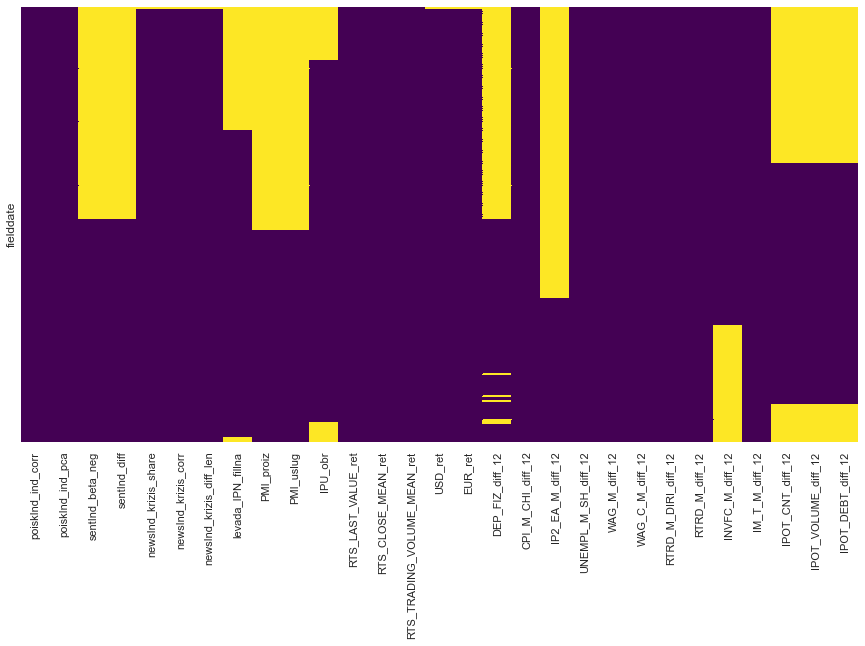

In [15]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(dff.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [16]:
100*(dff.isnull().sum()/dff.shape[0])

poiskInd_ind_corr               0.000000
poiskInd_ind_pca                0.000000
sentInd_beta_neg               48.730964
sentInd_diff                   48.730964
newsInd_krizis_share            0.507614
newsInd_krizis_corr             0.507614
newsInd_krizis_diff_len         0.507614
levada_IPN_fillna              29.441624
PMI_proiz                      51.269036
PMI_uslug                      51.269036
IPU_obr                        16.751269
RTS_LAST_VALUE_ret              0.000000
RTS_CLOSE_MEAN_ret              0.000000
RTS_TRADING_VOLUME_MEAN_ret     0.000000
USD_ret                         0.507614
EUR_ret                         0.507614
DEP_FIZ_diff_12                51.269036
CPI_M_CHI_diff_12               0.000000
IP2_EA_M_diff_12               67.005076
UNEMPL_M_SH_diff_12             0.000000
WAG_M_diff_12                   0.000000
WAG_C_M_diff_12                 0.000000
RTRD_M_DIRI_diff_12             0.000000
RTRD_M_diff_12                  0.000000
INVFC_M_diff_12 

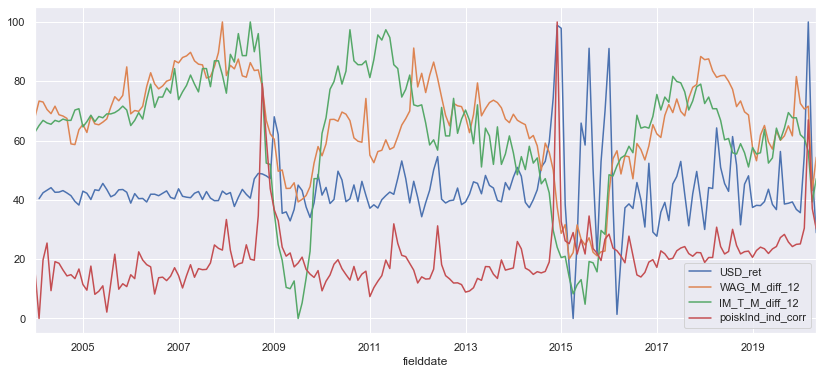

In [17]:
col = [
    'USD_ret',
    'WAG_M_diff_12', 
    'IM_T_M_diff_12',
    #'CPI_M_CHI_diff_12',
    #'UNEMPL_M_SH_diff_12',
    'poiskInd_ind_corr'
]

dff[col].plot(legend=True, figsize=(14,6));

# 6. Причинность по Грейнджеру

In [18]:
targets = ['RTS_LAST_VALUE_ret', 'RTS_CLOSE_MEAN_ret',
       'RTS_TRADING_VOLUME_MEAN_ret', 'USD_ret', 'EUR_ret', 'DEP_FIZ_diff_12',
       'CPI_M_CHI_diff_12', 'IP2_EA_M_diff_12', 'UNEMPL_M_SH_diff_12',
       'WAG_M_diff_12', 'WAG_C_M_diff_12', 'RTRD_M_DIRI_diff_12',
       'RTRD_M_diff_12', 'INVFC_M_diff_12', 'IM_T_M_diff_12',
       'IPOT_CNT_diff_12', 'IPOT_VOLUME_diff_12', 'IPOT_DEBT_diff_12']

auto_ind = ['poiskInd_ind_corr', 'poiskInd_ind_pca', 
            'sentInd_beta_neg', 'sentInd_diff', 
            'newsInd_krizis_share', 'newsInd_krizis_corr', 'newsInd_krizis_diff_len']

hand_ind = ['levada_IPN_fillna', 'PMI_proiz', 'PMI_uslug', 'IPU_obr']

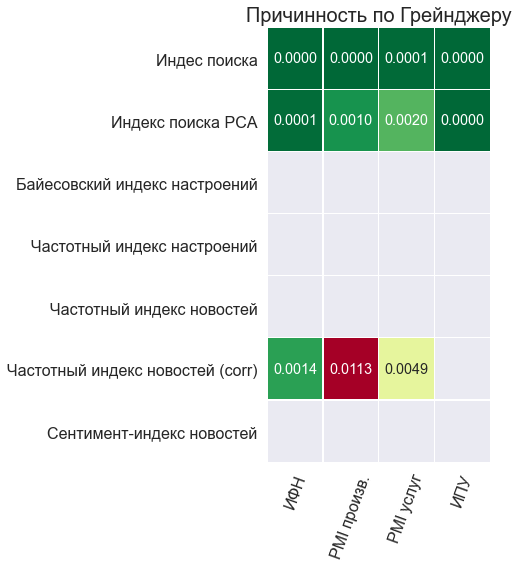

In [19]:
from statsmodels.tsa.api import VAR

# строки 
hand_ind = ['levada_IPN_fillna', 'PMI_proiz', 'PMI_uslug', 'IPU_obr']

# столбцы
auto_ind = ['poiskInd_ind_corr', 'poiskInd_ind_pca', 
            'sentInd_beta_neg', 'sentInd_diff', 
            'newsInd_krizis_share', 'newsInd_krizis_corr', 'newsInd_krizis_diff_len']

G = np.zeros((len(hand_ind), len(auto_ind)))
GG = np.zeros((len(hand_ind), len(auto_ind)))

for i in range(len(hand_ind)):
    for j in range(len(auto_ind)):
        
        tg = hand_ind[i]
        cs = auto_ind[j]
        
        data = dff[[tg, cs]].dropna().reset_index(drop=True)
        data.columns = ['target', 'cause']
        
        model = VAR(data)
        results = model.fit(1)
        gr = results.test_causality('target', 'cause')
        G[i,j] = gr.pvalue

        # таргет на причину
        GG[i,j] = pt_c = results.pvalues['cause']['L1.target']
        # причина на таргет 
        # G[i,j] = results.pvalues['target']['L1.cause']
        # квадрат т-статистики = F статистике 
        
G[G >= 0.05] = None

sns.set(font_scale=1.2)
fig, axes = plt.subplots(figsize=(4,8))
chart = sns.heatmap(G.T, cbar=False, annot=True, 
            fmt=".4f", linewidths=0.1, cmap='RdYlGn_r');

chart.set_yticklabels(rotation=0, fontsize=16, labels=['Индес поиска', 'Индекс поиска PCA', 
                                           'Байесовский индекс настроений', 'Частотный индекс настроений', 
                                           'Частотный индекс новостей', 'Частотный индекс новостей (corr)', 
                                           'Сентимент-индекс новостей'])

chart.set_xticklabels(rotation=70, fontsize=16, labels=['ИФН', 'PMI произв.', 'PMI услуг', 'ИПУ'])
plt.title('Причинность по Грейнджеру', fontsize=20);

# 7. Наукастинг

In [20]:
# !pip3 install --user scipy==1.2.0
import statsmodels.api as sm

get_ar1 = True
pvals = dict()
models = dict()

for target in targets + hand_ind:
    print(f'\nЗначимые модели для {target}:')
    ppp, mmm = [ ], [ ]
    for index in auto_ind + hand_ind:
        
        if target == index:
            ppp.append(-1)
            continue 
            
        df_cp = dff[[target, index]].dropna().copy()
        df_cp['constant'] = 1
        
        # брать ar(1) или нет 
        if get_ar1:
            df_cp[target + '_lag'] = df_cp[target].shift(1)
            df_cp = df_cp[1:]

        y = df_cp[target][1:]   

        y = df_cp[target].values
        X = df_cp.drop(target, axis=1).values
        features = list(df_cp.drop(target, axis=1).columns)
            
        
        model = sm.OLS(y, X).fit(cov_type='HC1') 
        pval = round(model.pvalues[0],2)
        if pval < 0.05:
            print(index, pval)
            mmm.append((index, model))
            
        ppp.append(pval)  
        
    pvals[target] = ppp
    models[target] = mmm


Значимые модели для RTS_LAST_VALUE_ret:
poiskInd_ind_corr 0.0
poiskInd_ind_pca 0.0
newsInd_krizis_corr 0.03
newsInd_krizis_diff_len 0.04

Значимые модели для RTS_CLOSE_MEAN_ret:
poiskInd_ind_corr 0.0
poiskInd_ind_pca 0.0
newsInd_krizis_share 0.03
newsInd_krizis_corr 0.03

Значимые модели для RTS_TRADING_VOLUME_MEAN_ret:
sentInd_diff 0.01
newsInd_krizis_diff_len 0.03
PMI_proiz 0.02

Значимые модели для USD_ret:
poiskInd_ind_corr 0.0
poiskInd_ind_pca 0.0

Значимые модели для EUR_ret:
poiskInd_ind_corr 0.01
poiskInd_ind_pca 0.02

Значимые модели для DEP_FIZ_diff_12:
newsInd_krizis_corr 0.03
PMI_uslug 0.03

Значимые модели для CPI_M_CHI_diff_12:

Значимые модели для IP2_EA_M_diff_12:
poiskInd_ind_corr 0.02
poiskInd_ind_pca 0.01
PMI_proiz 0.0
PMI_uslug 0.0

Значимые модели для UNEMPL_M_SH_diff_12:
poiskInd_ind_corr 0.02
poiskInd_ind_pca 0.01
newsInd_krizis_corr 0.0
PMI_proiz 0.0
PMI_uslug 0.0
IPU_obr 0.0

Значимые модели для WAG_M_diff_12:
poiskInd_ind_corr 0.0
poiskInd_ind_pca 0.0
newsInd

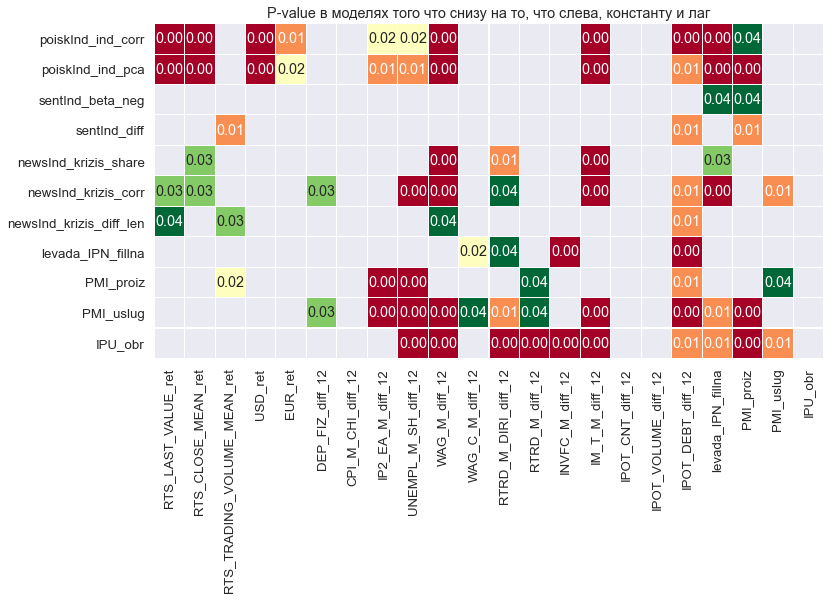

In [21]:
df_res = pd.DataFrame(pvals).T
df_res.columns = auto_ind + hand_ind
df_res = df_res.T

df_res[df_res >= 0.05] = None
df_res[df_res == -1] = None

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df_res, cbar=False, square=True, annot=True, fmt=".2f", 
            linewidths=0.1, cmap='RdYlGn');
plt.title('P-value в моделях того что снизу на то, что слева, константу и лаг');

``pip3 install git+https://github.com/statsmodels/statsmodels.git --upgrade``

``pip3 install pmdarima``

In [24]:
import pmdarima as pm
from pmdarima import model_selection
from collections import defaultdict

def fit_arima(y, test_per=24, verbouse=False):

    y_train = y[:-test_per]
    y_test = y[-test_per:]

    # подбор модели только для таргета
    arima_model = pm.auto_arima(
        y_train,
        start_p=1, start_q=1,
        max_p=12, max_q=12, 
        m=12,
        start_P=0, 
        d=0, D=0,
        seasonal=False,
        #trace=True,
        error_action='ignore',  
        suppress_warnings=True, 
        stepwise=True, 
        n_fits=100,
        information_criterion='bic',
        #scoring='mae',
        #out_of_sample_size=test_per 
    )

    aic_noIndex = arima_model.aic()

    cv = model_selection.SlidingWindowForecastCV(window_size=y_train.size, step=1, h=1)
    predicts_noIndex = model_selection.cross_val_predict(
        arima_model,
        y,
        cv=cv,
        #verbose=2,
        averaging="mean"
    )
    
    if verbouse:
        print("AIC:", aic_noIndex)   
    
        plt.figure(figsize=(15,6))
        x_axis = np.arange(y.shape[0])
        n_test = predicts_noIndex.size

        plt.plot(x_axis[-(n_test + 10):], y[-(n_test + 10):], alpha=0.75, c='b', label='test', lw=2)
        plt.plot(x_axis[-n_test:], predicts_noIndex, alpha=0.75, c='r', label='no_index', lw=2)
        plt.title("Cross-validated wineind forecasts")
        plt.legend();
    
    return arima_model, predicts_noIndex, y[-test_per:]


def fit_arima_exo(y, x, test_per=32, verbouse=False):

    y_train, x_train = y[:-test_per], x[:-test_per]    
    y_test, x_test = y[-test_per:], x[-test_per:]

    # подбор модели c таргетом и экзогеном
    arima_Index_model = pm.auto_arima(
        y_train,
        exogenous=np.array([x_train]).T,
        start_p=1, start_q=1,
        max_p=12, max_q=12, 
        m=12,
        start_P=0, 
        d=0, D=0,
        seasonal=False,
        #trace=True,
        error_action='ignore',  
        suppress_warnings=True, 
        stepwise=True, 
        information_criterion='bic',
        n_fits=100
    )

    arima_Index_model.with_intercept = False
    arima_Index_model.fit(y_train, exogenous=np.array([x_train]).T)
    aic_Index = arima_Index_model.aic()

    cv = model_selection.SlidingWindowForecastCV(window_size=y_train.size, step=1, h=1)
    predicts_Index = model_selection.cross_val_predict(
        arima_Index_model,
        y,
        exogenous = np.array([np.ones_like(x), x]).T,
        cv=cv,
        #verbose=2,
        averaging="mean"
    )
    
    if verbouse:
        print("AIC:", aic_Index)   
    
        plt.figure(figsize=(15,6))
        x_axis = np.arange(y.shape[0])
        n_test = predicts_Index.size

        plt.plot(x_axis[-(n_test + 10):], y[-(n_test + 10):], alpha=0.75, c='b', label='test', lw=2)
        plt.plot(x_axis[-n_test:], predicts_Index, alpha=0.75, c='r', label='index', lw=2)
        plt.title("Cross-validated wineind forecasts")
        plt.legend();
        
    return arima_Index_model, predicts_Index, y[-test_per:]

In [25]:
targets_1 = targets + hand_ind
indexes_1 = auto_ind + hand_ind
    
models_arima = defaultdict(dict)
models_index = defaultdict(dict)

In [26]:
for i in range(len(targets_1)):
    target = targets_1[i]
    print(target)
    
    for j in range(len(indexes_1)):    
        index = indexes_1[j]
        print(index)

        df_cp = dff[[target, index]].dropna().copy()
        
        if target == index:
            continue
            
        y = df_cp[target].values
        x = df_cp[index].values
                
        md, pr, yt = fit_arima(y, test_per=int(0.3*(y.size) + 1))
        
        models_arima[(target,index)]['model'] = md
        models_arima[(target,index)]['predict'] = pr
        models_arima[(target,index)]['test'] = yt

        try:
            md, pr, yt = fit_arima_exo(y, x, test_per=int(0.3*(y.size) + 1))      
            models_index[(target,index)]['model'] = md
            models_index[(target,index)]['predict'] = pr
            models_index[(target,index)]['test'] = yt
        except:
            print('Ошибка', target, index)

RTS_LAST_VALUE_ret
poiskInd_ind_corr
poiskInd_ind_pca
sentInd_beta_neg
sentInd_diff
newsInd_krizis_share
newsInd_krizis_corr
newsInd_krizis_diff_len
levada_IPN_fillna
PMI_proiz
PMI_uslug
IPU_obr
RTS_CLOSE_MEAN_ret
poiskInd_ind_corr
poiskInd_ind_pca
sentInd_beta_neg
sentInd_diff
newsInd_krizis_share
newsInd_krizis_corr
newsInd_krizis_diff_len
levada_IPN_fillna
PMI_proiz
PMI_uslug
IPU_obr
RTS_TRADING_VOLUME_MEAN_ret
poiskInd_ind_corr
poiskInd_ind_pca
sentInd_beta_neg
sentInd_diff
newsInd_krizis_share
newsInd_krizis_corr
newsInd_krizis_diff_len
levada_IPN_fillna
PMI_proiz
PMI_uslug
IPU_obr
USD_ret
poiskInd_ind_corr
poiskInd_ind_pca
sentInd_beta_neg
sentInd_diff
newsInd_krizis_share
newsInd_krizis_corr
newsInd_krizis_diff_len
levada_IPN_fillna
PMI_proiz
PMI_uslug
IPU_obr
EUR_ret
poiskInd_ind_corr
poiskInd_ind_pca
sentInd_beta_neg
sentInd_diff
newsInd_krizis_share
newsInd_krizis_corr
newsInd_krizis_diff_len
levada_IPN_fillna
PMI_proiz
PMI_uslug
IPU_obr
DEP_FIZ_diff_12
poiskInd_ind_corr
pois

__Насколько сильно какой из индексов в среднем уменьшает MAE за счёт добавления__ 

In [387]:
len(models_index)

237

In [388]:
result_arima = defaultdict(dict)
result_index = defaultdict(dict)

for k in models_index.keys():
    item = models_index[k]
    #metric_index = np.mean(np.abs(item['test'] - item['predict']))
    metric_index = np.sqrt(np.mean((item['test'] - item['predict'])**2))
    result_index[k[0]].update({k[1] : metric_index})
    
    jtem = models_arima[k]
    #metric_arima = np.mean(np.abs(jtem['test'] - jtem['predict']))
    metric_arima = np.sqrt(np.mean((jtem['test'] - jtem['predict'])**2))
    result_arima[k[0]].update({k[1] : metric_arima})

In [389]:
MMM = (pd.DataFrame(result_arima) - pd.DataFrame(result_index)).drop(['levada_IPN_fillna', 'PMI_proiz',
                                                                      'PMI_uslug', 'IPU_obr'], axis=1)
MMM

,RTS_LAST_VALUE_ret,RTS_CLOSE_MEAN_ret,RTS_TRADING_VOLUME_MEAN_ret,USD_ret,EUR_ret,DEP_FIZ_diff_12,CPI_M_CHI_diff_12,IP2_EA_M_diff_12,UNEMPL_M_SH_diff_12,WAG_M_diff_12,WAG_C_M_diff_12,RTRD_M_DIRI_diff_12,RTRD_M_diff_12,INVFC_M_diff_12,IM_T_M_diff_12,IPOT_CNT_diff_12,IPOT_VOLUME_diff_12,IPOT_DEBT_diff_12
poiskInd_ind_corr,0.786130,2.069155,-0.238557,0.054716,1.885144,0.323302,-0.022593,-1.413233,-0.040019,0.168065,0.069569,0.498275,1.286762,0.253098,-0.308430,0.106825,0.138110,0.130569
poiskInd_ind_pca,0.671734,1.517009,-0.050522,1.522746,1.594869,0.372625,-0.021109,-0.479548,-0.044581,0.178087,0.047304,0.258208,1.216480,0.306713,-0.269446,0.135261,0.166139,0.130763
sentInd_beta_neg,0.174519,0.405919,-0.088047,0.524978,0.346254,0.232635,-0.003280,-0.051262,0.190302,-0.297183,0.028351,0.048836,0.089452,0.184667,0.078268,-0.020247,-0.022460,-0.450763
sentInd_diff,0.033611,0.079105,0.094677,-0.021240,-0.032505,0.271871,-0.004461,-0.024127,0.009801,-0.145928,-0.092560,-0.023725,-0.012172,-0.666053,0.295338,-0.008090,-0.006286,-0.227832
newsInd_krizis_share,-0.202147,0.148539,0.002697,0.554701,0.112723,0.931483,-0.000876,0.060916,0.122756,0.223492,0.128821,0.029063,-0.059867,-0.138139,0.121455,-0.079393,-0.072980,-0.009603
newsInd_krizis_corr,-0.289800,0.309189,-0.049461,0.544181,0.125955,0.615271,-0.001914,-1.613123,-0.000134,0.173565,-0.022546,0.072433,0.876548,0.140186,0.024270,0.522153,0.525550,0.091301
newsInd_krizis_diff_len,-0.040470,-0.011120,0.044380,-0.076442,-0.090901,0.220845,0.002820,-0.830635,-0.061000,0.182191,0.008862,0.080087,0.087502,0.206731,-0.279425,0.288942,0.270762,0.053710
levada_IPN_fillna,-0.188948,-0.027009,-0.054897,1.545659,0.102827,0.414451,-0.001878,-0.242252,0.034374,0.013866,0.057955,0.022141,0.006986,-1.639440,0.000644,-0.104696,-0.080340,0.268400
PMI_proiz,-0.686046,-1.219777,-0.105825,-1.732160,-0.691678,-5.153727,-0.006899,4.257656,0.014908,2.360771,0.855852,0.906281,1.368288,-0.208287,0.849635,-0.261995,-0.236077,-0.114840
PMI_uslug,-2.293360,-2.407814,-1.316044,-6.135056,-5.599446,-0.374474,-0.007789,3.186667,-0.454321,-0.183134,-2.315729,-0.753005,-0.879315,-0.640421,NaN,-0.003301,0.027215,-0.028795


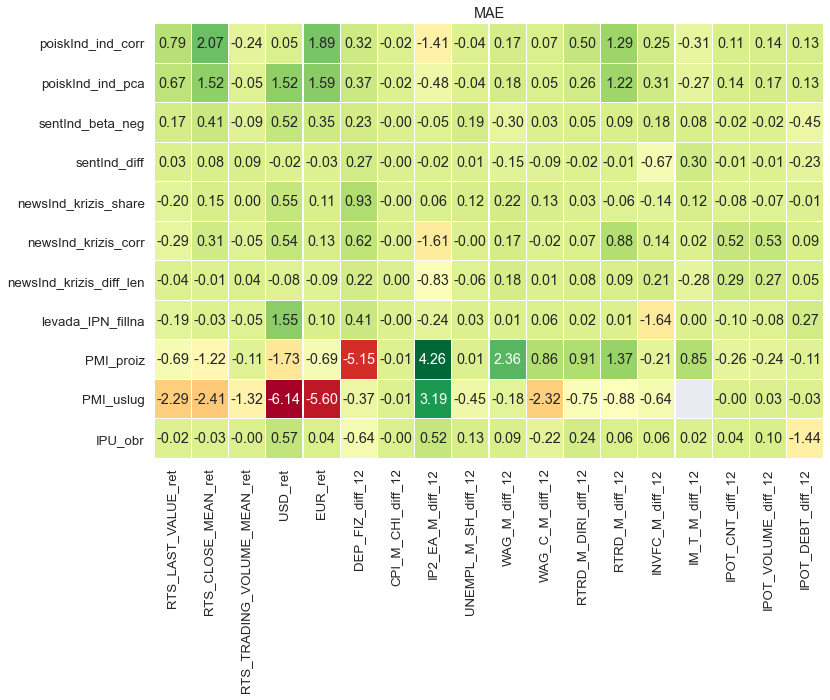

In [390]:
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(12,8))
chart = sns.heatmap(MMM, cbar=False, annot=True, 
            fmt=".2f", linewidths=0.1, cmap='RdYlGn')

# chart.set_xticklabels(rotation=90, labels=targets_1[:-4])
# chart.set_yticklabels(rotation=0, labels=indexes_1)
plt.title('MAE');

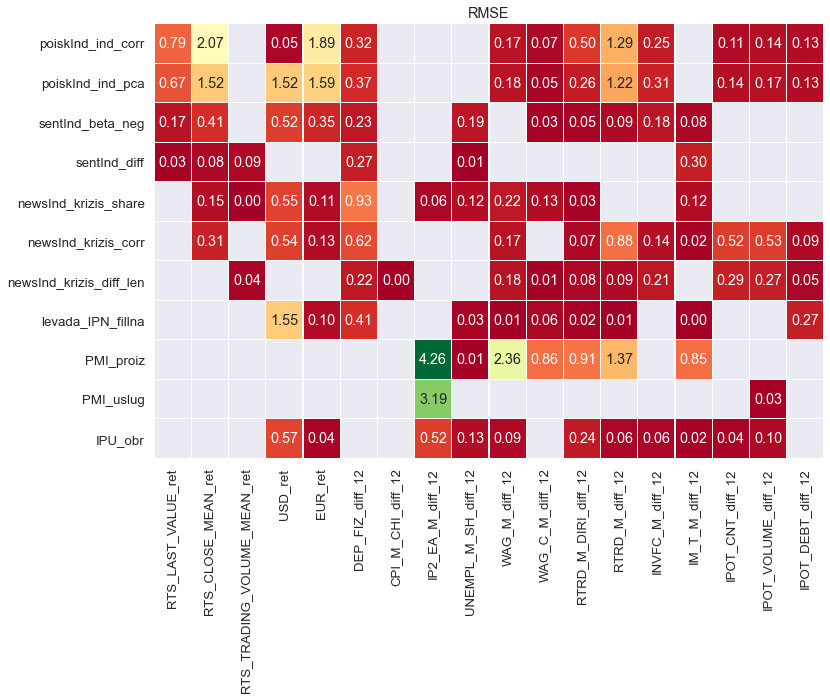

In [391]:
MMM_g = MMM.copy()
MMM_g[MMM_g < 0] = None

sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(12,8))
chart = sns.heatmap(MMM_g, cbar=False, annot=True, 
            fmt=".2f", linewidths=0.1, cmap='RdYlGn')
plt.title('RMSE');

In [395]:
MMM.T.to_csv('b.tsv', sep='\t')

In [340]:
MMM_g.size - MMM_g.isnull().sum().sum()

100

In [341]:
np.nan_to_num(MMM_g).mean()

0.1330039508262039

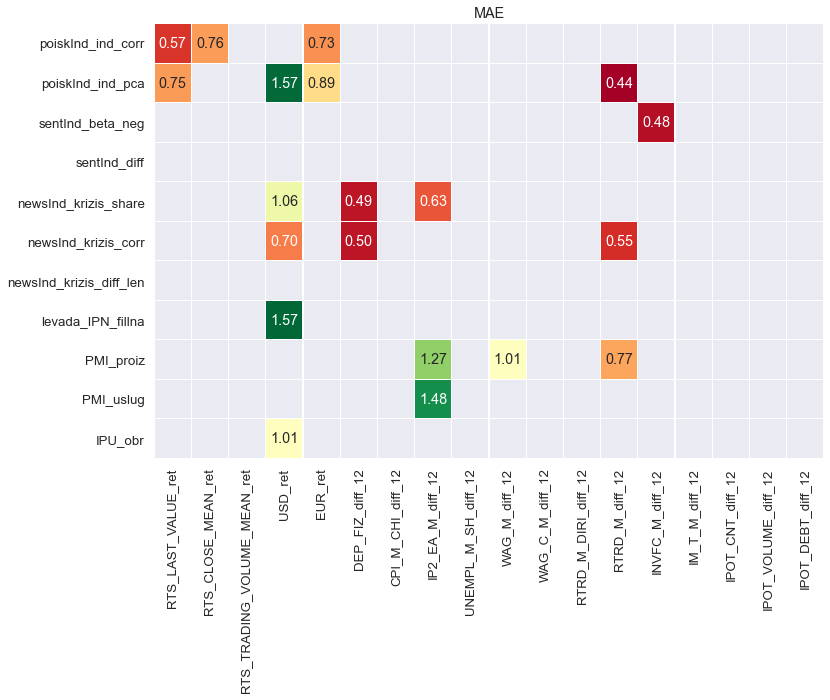

In [342]:
MMM_g = MMM.copy()
q = np.quantile([item  for jtem in MMM.fillna(0).values for item in jtem], 0.9)
MMM_g[MMM_g < q] = None

sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(12,8))
chart = sns.heatmap(MMM_g, cbar=False, annot=True, 
            fmt=".2f", linewidths=0.1, cmap='RdYlGn')
plt.title('MAE');

__Тест Дилдо-Маринара__ )00)0)

In [419]:
from dm_test import dm_test
import scipy.stats as sts

dmt = defaultdict(dict)
for k in models_index.keys():
    item = models_index[k]
    jtem = models_arima[k]

    _, p = dm_test(item['test'], item['predict'], jtem['predict'], h = 1, crit="MAD", power=1)
    dmt[k[0]].update({k[1] : p/2})

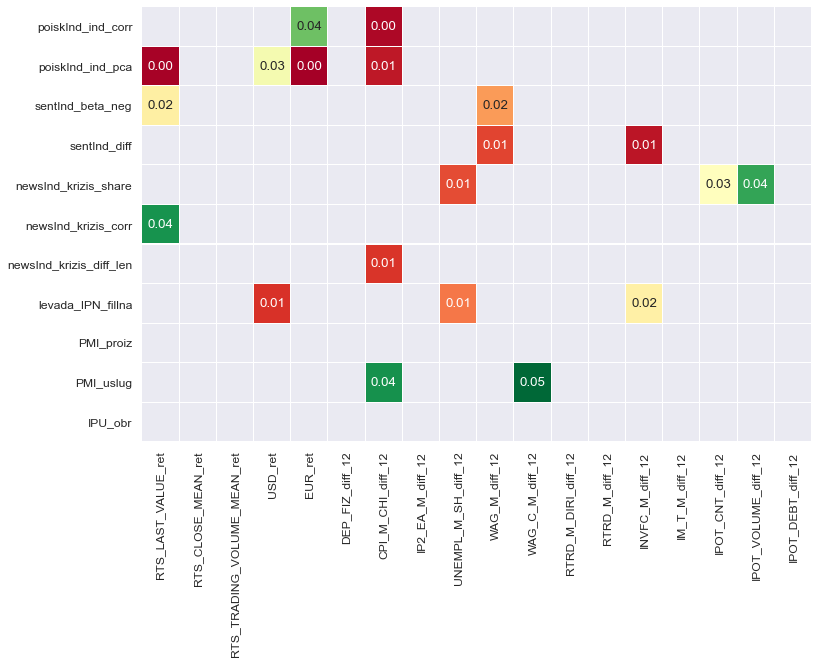

In [420]:
DM = pd.DataFrame(dmt)
DM.drop(['levada_IPN_fillna', 'PMI_proiz','PMI_uslug', 'IPU_obr'], axis=1, inplace=True)
DM_g = DM.copy()
DM_g[DM_g >= 0.05] = None

sns.set(font_scale=1.1)
fig, ax = plt.subplots(figsize=(12,8))
chart = sns.heatmap(DM_g, cbar=False, annot=True, 
            fmt=".2f", linewidths=0.1, cmap='RdYlGn')

# chart.set_xticklabels(rotation=90, labels=targets_1[:-4])
# chart.set_yticklabels(rotation=0, labels=indexes_1)
#plt.title('MAE');

In [421]:
DM_g.T.to_csv('b.tsv', sep='\t')

In [428]:
MMM.fillna(0).mean(axis=1).sort_values(ascending=False) # RMSE

newsInd_krizis_corr        0.183755
poiskInd_ind_corr          0.061201
levada_IPN_fillna         -0.021976
newsInd_krizis_diff_len   -0.037120
newsInd_krizis_share      -0.038156
sentInd_diff              -0.053513
PMI_proiz                 -0.101704
poiskInd_ind_pca          -0.129551
IPU_obr                   -0.131358
sentInd_beta_neg          -0.209565
PMI_uslug                 -0.768782
dtype: float64

In [370]:
(DM_g < 0.05).sum(axis=1).sort_values(ascending=False)

levada_IPN_fillna          4
poiskInd_ind_pca           4
newsInd_krizis_share       3
sentInd_beta_neg           3
PMI_uslug                  2
newsInd_krizis_diff_len    2
sentInd_diff               2
poiskInd_ind_corr          2
newsInd_krizis_corr        1
IPU_obr                    0
PMI_proiz                  0
dtype: int64

In [371]:
sign = []
for item in MMM.index:
    sign.append([item, MMM.loc[item][DM_g.loc[item] < 0.05].mean()])
    
pd.DataFrame(sign).set_index(0)[1].fillna(0).sort_values(ascending=False)

0
poiskInd_ind_pca           0.798397
poiskInd_ind_corr          0.359604
levada_IPN_fillna          0.123296
newsInd_krizis_diff_len    0.005736
IPU_obr                    0.000000
PMI_proiz                  0.000000
newsInd_krizis_share      -0.085186
sentInd_beta_neg          -0.114705
newsInd_krizis_corr       -0.385904
sentInd_diff              -0.470422
PMI_uslug                 -0.673006
Name: 1, dtype: float64

# 8. Прогнозирование

In [131]:
models_indexF = defaultdict(dict)
models_arimaF = defaultdict(dict)

In [132]:
for i in range(len(targets_1)):
    target = targets_1[i]
    print(target)
    
    for j in range(len(indexes_1)):
        index = indexes_1[j]
        print(index)
        df_cp = dff[[target, index]].dropna().copy()
        if target == index:
            continue
            
        x = df_cp[index].values[:-1]
        y = df_cp[target].values[1:]
        
        md, pr, yt = fit_arima(y, test_per=int(0.3*(y.size) + 1))
        models_arimaF[(target,index)]['model'] = md
        models_arimaF[(target,index)]['predict'] = pr
        models_arimaF[(target,index)]['test'] = yt
        
        try:
            md, pr, yt = fit_arima_exo(y, x, test_per=int(0.3*(y.size) + 1))       
            models_indexF[(target,index)]['model'] = md
            models_indexF[(target,index)]['predict'] = pr
            models_indexF[(target,index)]['test'] = yt
        except:
            print('Ошибка', target, index)

RTS_LAST_VALUE_ret
poiskInd_ind_corr
poiskInd_ind_pca
sentInd_beta_neg
sentInd_diff
newsInd_krizis_share
newsInd_krizis_corr
newsInd_krizis_diff_len
levada_IPN_fillna
PMI_proiz
PMI_uslug
IPU_obr
RTS_CLOSE_MEAN_ret
poiskInd_ind_corr
poiskInd_ind_pca
sentInd_beta_neg
sentInd_diff
newsInd_krizis_share
newsInd_krizis_corr
newsInd_krizis_diff_len
levada_IPN_fillna
PMI_proiz
PMI_uslug
IPU_obr
RTS_TRADING_VOLUME_MEAN_ret
poiskInd_ind_corr
poiskInd_ind_pca
sentInd_beta_neg
sentInd_diff
newsInd_krizis_share
newsInd_krizis_corr
newsInd_krizis_diff_len
levada_IPN_fillna
PMI_proiz
PMI_uslug
IPU_obr
USD_ret
poiskInd_ind_corr
poiskInd_ind_pca
sentInd_beta_neg
sentInd_diff
newsInd_krizis_share
newsInd_krizis_corr
newsInd_krizis_diff_len
levada_IPN_fillna
PMI_proiz
PMI_uslug
IPU_obr
EUR_ret
poiskInd_ind_corr
poiskInd_ind_pca
sentInd_beta_neg
sentInd_diff
newsInd_krizis_share
newsInd_krizis_corr
newsInd_krizis_diff_len
levada_IPN_fillna
PMI_proiz
PMI_uslug
IPU_obr
DEP_FIZ_diff_12
poiskInd_ind_corr
pois

In [401]:
result_arima = defaultdict(dict)
result_index_f = defaultdict(dict)

for k in models_index.keys():
    item = models_indexF[k]
    #metric_index = np.mean(np.abs(item['test'] - item['predict']))
    metric_index = np.sqrt(np.mean((item['test'] - item['predict'])**2))
    result_index_f[k[0]].update({k[1] : metric_index})
    
    jtem = models_arima[k]
    #metric_arima = np.mean(np.abs(jtem['test'] - jtem['predict']))
    metric_arima = np.sqrt(np.mean((jtem['test'] - jtem['predict'])**2))
    result_arima[k[0]].update({k[1] : metric_arima})

In [402]:
MMM = (pd.DataFrame(result_arima) - pd.DataFrame(result_index_f)).drop(['levada_IPN_fillna', 'PMI_proiz',
                                                                      'PMI_uslug', 'IPU_obr'], axis=1)
MMM

,RTS_LAST_VALUE_ret,RTS_CLOSE_MEAN_ret,RTS_TRADING_VOLUME_MEAN_ret,USD_ret,EUR_ret,DEP_FIZ_diff_12,CPI_M_CHI_diff_12,IP2_EA_M_diff_12,UNEMPL_M_SH_diff_12,WAG_M_diff_12,WAG_C_M_diff_12,RTRD_M_DIRI_diff_12,RTRD_M_diff_12,INVFC_M_diff_12,IM_T_M_diff_12,IPOT_CNT_diff_12,IPOT_VOLUME_diff_12,IPOT_DEBT_diff_12
poiskInd_ind_corr,-0.387909,-0.116568,0.196592,-0.064106,0.469350,-0.019448,-0.024605,0.418783,-0.246701,0.284129,-0.034189,-0.000239,0.594382,0.010584,-0.015804,-0.035071,-0.037630,0.110060
poiskInd_ind_pca,-0.171186,-0.031752,0.246891,0.014883,-0.070770,-0.046116,-0.021222,-3.440190,-0.224160,0.361440,0.132877,0.042358,0.734982,0.039494,-0.068416,0.025190,0.032764,0.111008
sentInd_beta_neg,0.051279,-0.019034,-0.069354,-0.020279,-0.005911,0.289738,-0.006944,-0.325898,-0.272204,-0.008927,-0.781352,0.033243,-1.699345,0.236681,0.332338,-0.243825,-0.251978,-1.010397
sentInd_diff,-0.101739,-0.055361,-0.059075,-0.075255,0.026015,0.310635,0.000100,-0.194976,-0.028578,-0.018953,0.039084,-0.021743,-0.007961,-0.084937,0.044628,-0.172541,-0.181996,-0.380575
newsInd_krizis_share,-0.477658,-0.226027,0.092079,0.072059,-0.030909,0.215745,-0.001922,-0.134592,0.037530,0.209199,0.039978,0.078268,0.159008,0.000395,-0.068366,-0.127185,-0.089067,-0.435347
newsInd_krizis_corr,-0.604220,-0.007110,0.163787,0.082090,0.532532,0.419018,-0.020791,0.994536,0.286005,0.474625,0.132746,0.083863,0.755784,-0.011550,-0.093448,0.042390,0.058773,0.018566
newsInd_krizis_diff_len,-0.108112,-0.158832,-0.070494,-0.474837,-0.120049,0.377608,0.000842,-0.208387,-0.032364,0.204923,-0.151260,0.063008,-0.060505,-0.021703,-0.149039,-0.003160,0.043004,0.201195
levada_IPN_fillna,-0.470579,-0.773269,0.072190,1.315492,-0.028294,0.200935,-0.004852,-0.070039,0.056904,0.016390,0.002271,-0.063997,-0.159576,-0.476983,0.067616,-0.104147,-0.047142,0.071517
PMI_proiz,-0.243369,-0.198501,-0.398916,-0.365408,0.360374,-5.964198,-0.006075,3.717447,0.463311,0.215891,-0.744074,-0.485287,1.545129,1.275067,-0.182857,-0.107581,-0.142464,-0.569153
PMI_uslug,-0.094263,-0.416041,0.441363,-1.037569,-0.085525,-1.619485,-0.008943,2.203959,0.337254,-2.211348,-4.671601,-4.676517,-1.733866,-0.645542,NaN,0.029747,0.009640,0.340652


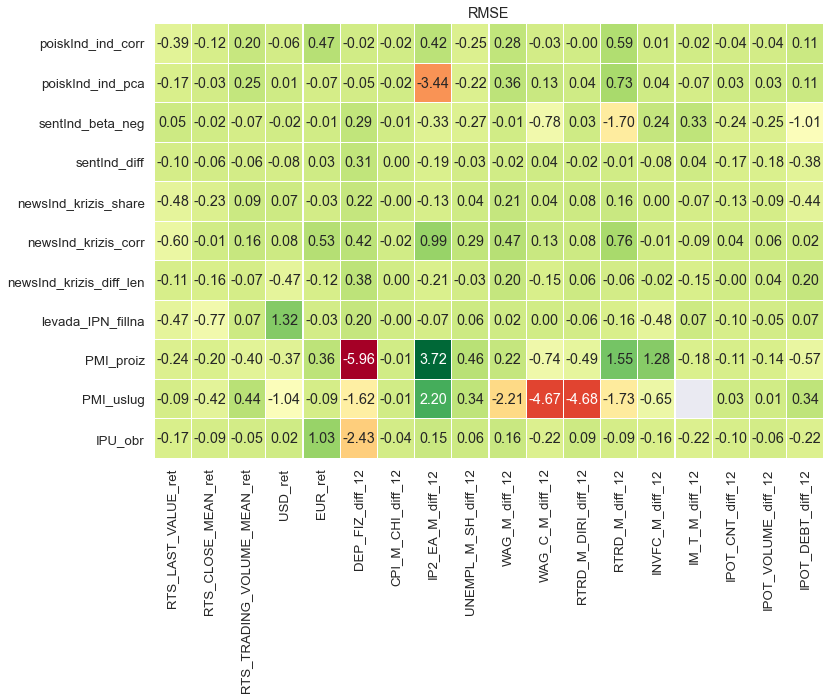

In [403]:
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(12,8))
chart = sns.heatmap(MMM, cbar=False, annot=True, 
            fmt=".2f", linewidths=0.1, cmap='RdYlGn')

# chart.set_xticklabels(rotation=90, labels=targets_1[:-4])
# chart.set_yticklabels(rotation=0, labels=indexes_1)
plt.title('RMSE');

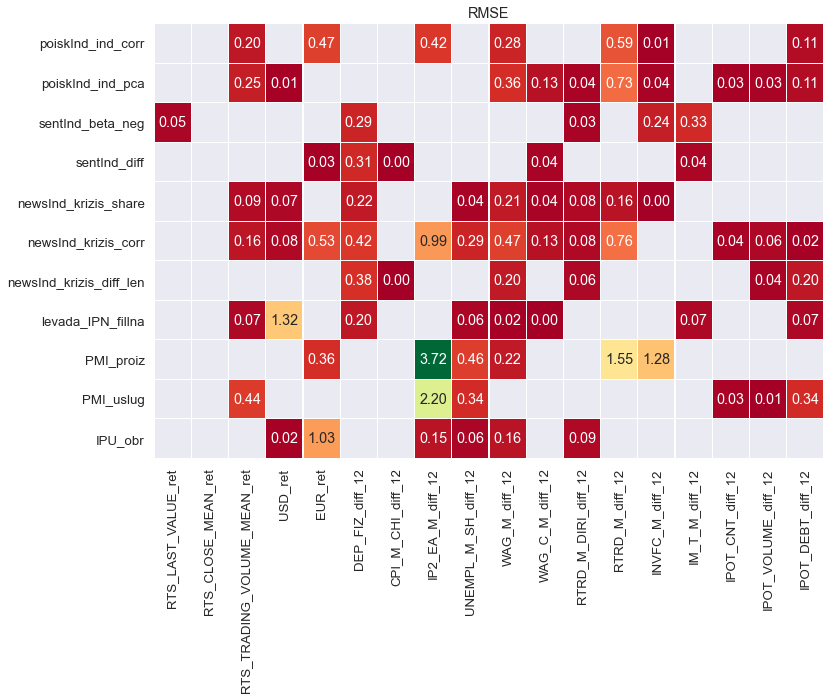

In [404]:
MMM_g = MMM.copy()
MMM_g[MMM_g < 0] = None

sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(12,8))
chart = sns.heatmap(MMM_g, cbar=False, annot=True, 
            fmt=".2f", linewidths=0.1, cmap='RdYlGn')
plt.title('RMSE');

In [405]:
MMM_g.size - MMM_g.isnull().sum().sum()

81

In [406]:
np.nan_to_num(MMM_g).mean()

0.12764472303933774

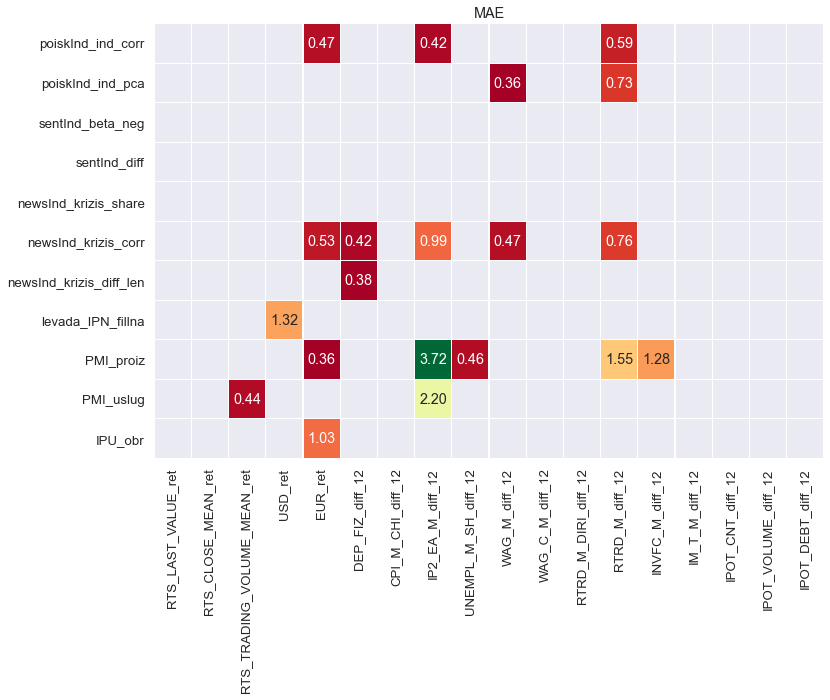

In [407]:
MMM_g = MMM.copy()
q = np.quantile([item  for jtem in MMM.fillna(0).values for item in jtem], 0.9)
MMM_g[MMM_g < q] = None

sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(12,8))
chart = sns.heatmap(MMM_g, cbar=False, annot=True, 
            fmt=".2f", linewidths=0.1, cmap='RdYlGn')
plt.title('MAE');

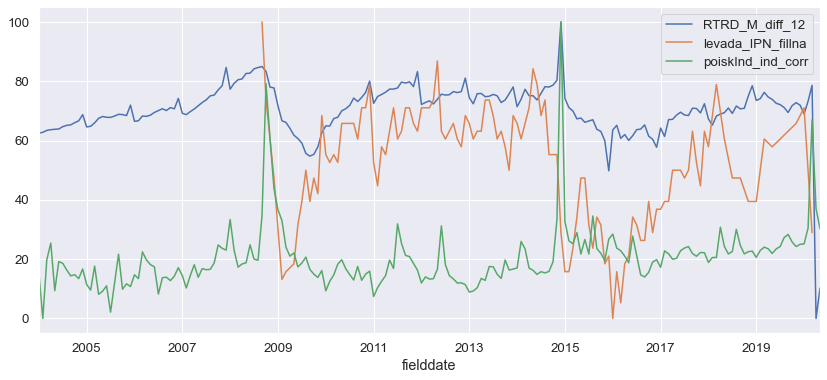

In [408]:
col = [
    'RTRD_M_diff_12',
    'levada_IPN_fillna',
    #'WAG_M_diff_12', 
    #'IM_T_M_diff_12',
    #'CPI_M_CHI_diff_12',
    #'UNEMPL_M_SH_diff_12',
    'poiskInd_ind_corr'
]

dff[col].plot(legend=True, figsize=(14,6));

In [409]:
MMM.T.to_csv('b.tsv', sep='\t')

__Тест Дилдо-Маринара__ )00)0)

In [422]:
from dm_test import dm_test
import random

dmt = defaultdict(dict)
for k in models_indexF.keys():
    item = models_indexF[k]
    jtem = models_arimaF[k]
    
    _, p = dm_test(item['test'], item['predict'], jtem['predict'], h = 1, crit="MAD", power=2)
    dmt[k[0]].update({k[1] : p})

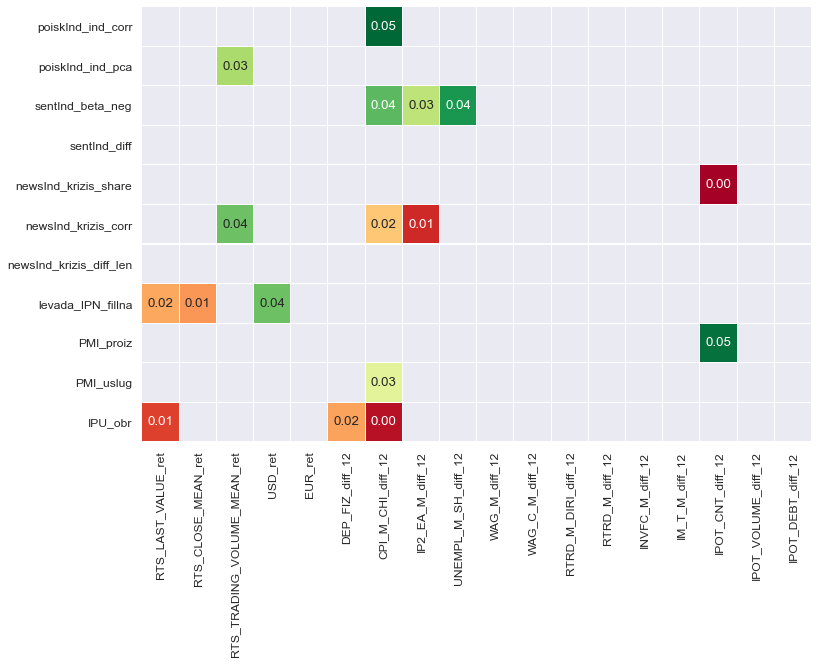

In [423]:
DM = pd.DataFrame(dmt)
DM.drop(['levada_IPN_fillna', 'PMI_proiz','PMI_uslug', 'IPU_obr'], axis=1, inplace=True)
DM_g = DM.copy()
DM_g[DM_g >= 0.05] = None

sns.set(font_scale=1.1)
fig, ax = plt.subplots(figsize=(12,8))
chart = sns.heatmap(DM_g, cbar=False, annot=True, 
            fmt=".2f", linewidths=0.1, cmap='RdYlGn')

# chart.set_xticklabels(rotation=90, labels=targets_1[:-4])
# chart.set_yticklabels(rotation=0, labels=indexes_1)
#plt.title('MAE');

In [424]:
MMM.fillna(0).mean(axis=1).sort_values(ascending=False) # RMSE

newsInd_krizis_corr        0.183755
poiskInd_ind_corr          0.061201
levada_IPN_fillna         -0.021976
newsInd_krizis_diff_len   -0.037120
newsInd_krizis_share      -0.038156
sentInd_diff              -0.053513
PMI_proiz                 -0.101704
poiskInd_ind_pca          -0.129551
IPU_obr                   -0.131358
sentInd_beta_neg          -0.209565
PMI_uslug                 -0.768782
dtype: float64

In [425]:
(DM_g < 0.05).sum(axis=1).sort_values(ascending=False)

IPU_obr                    3
levada_IPN_fillna          3
newsInd_krizis_corr        3
sentInd_beta_neg           3
PMI_uslug                  1
PMI_proiz                  1
newsInd_krizis_share       1
poiskInd_ind_pca           1
poiskInd_ind_corr          1
newsInd_krizis_diff_len    0
sentInd_diff               0
dtype: int64

In [426]:
sign = []
for item in MMM.index:
    sign.append([item, MMM.loc[item][DM_g.loc[item] < 0.05].mean()])
    
pd.DataFrame(sign).set_index(0)[1].fillna(0).sort_values(ascending=False)

0
newsInd_krizis_corr        0.379177
poiskInd_ind_pca           0.246891
levada_IPN_fillna          0.023882
newsInd_krizis_diff_len    0.000000
sentInd_diff               0.000000
PMI_uslug                 -0.008943
poiskInd_ind_corr         -0.024605
PMI_proiz                 -0.107581
newsInd_krizis_share      -0.127185
sentInd_beta_neg          -0.201682
IPU_obr                   -0.878559
Name: 1, dtype: float64

In [427]:
DM_g.T.to_csv('b.tsv', sep='\t')

-------------

__Дебаг__ 

In [72]:
dff.columns

Index(['poiskInd_ind_corr', 'poiskInd_ind_pca', 'sentInd_beta_neg',
       'sentInd_diff', 'newsInd_krizis_share', 'newsInd_krizis_corr',
       'newsInd_krizis_diff_len', 'levada_IPN_fillna', 'PMI_proiz',
       'PMI_uslug', 'IPU_obr', 'RTS_LAST_VALUE_ret', 'RTS_CLOSE_MEAN_ret',
       'RTS_TRADING_VOLUME_MEAN_ret', 'USD_ret', 'EUR_ret', 'DEP_FIZ_diff_12',
       'CPI_M_CHI_diff_12', 'IP2_EA_M_diff_12', 'UNEMPL_M_SH_diff_12',
       'WAG_M_diff_12', 'WAG_C_M_diff_12', 'RTRD_M_DIRI_diff_12',
       'RTRD_M_diff_12', 'INVFC_M_diff_12', 'IM_T_M_diff_12',
       'IPOT_CNT_diff_12', 'IPOT_VOLUME_diff_12', 'IPOT_DEBT_diff_12'],
      dtype='object')

In [73]:
target = 'RTS_LAST_VALUE_ret'
index = 'poiskInd_ind_corr'
#index = 'levada_IPN_fillna'

df_cp = dff[[target, index]].copy().dropna()
print(df_cp.shape)
df_cp.head()

(197, 2)


,RTS_LAST_VALUE_ret,poiskInd_ind_corr
fielddate,,
2004-01-01,62.166656,15.679730
2004-02-01,64.124509,0.000000
2004-03-01,67.150867,19.770509
2004-04-01,40.848102,25.436467
2004-05-01,50.065090,9.381211


In [74]:
x = df_cp[index].values[:-1]
y = df_cp[target].values[1:]

x[:5], y[:5]

(array([15.67972961,  0.        , 19.77050927, 25.4364665 ,  9.3812105 ]),
 array([64.1245086 , 67.15086679, 40.84810208, 50.0650899 , 56.80479474]))

AIC: 1238.6068657363287


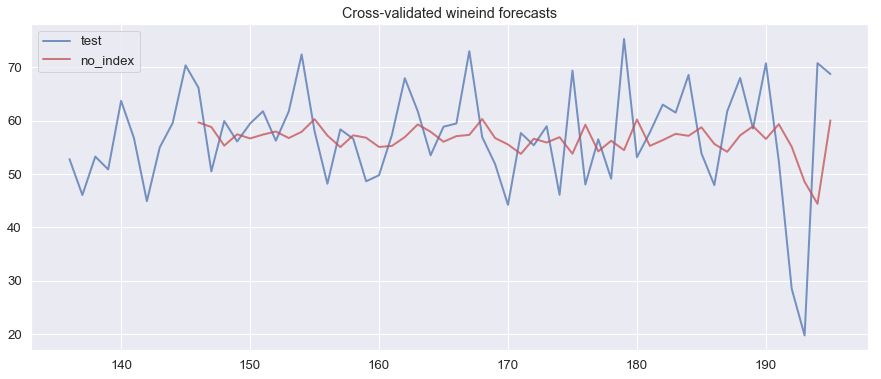

In [76]:
model, pred, ls = fit_arima(y, test_per=int(0.25*(y.size) + 1), verbouse=True)

In [77]:
model

ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True)

AIC: 1462.8793558243497


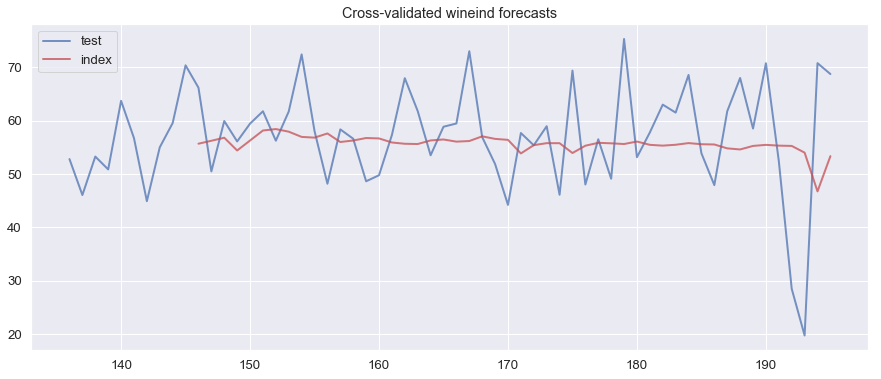

In [80]:
model_e, pred, ls = fit_arima_exo(y, x, test_per=int(0.25*(y.size) + 1), verbouse=True)

In [81]:
model_e

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)